(200, 200)


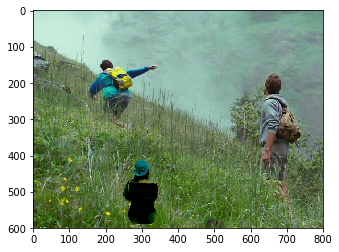

In [9]:
from getIndexes import getIndexes
from getCoefficientMatrix import getCoefficientMatrix
from getSolutionVect import getSolutionVect
from reconstructImg import reconstructImg

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from numpy.linalg import inv
from scipy import signal

def maskImage(img):
    mask = np.array(img.convert('L'))
    high_i,high_j = np.where(mask>40)
    low_i,low_j =  np.where(mask<=40)
    mask[high_i,high_j] = 1
    mask[low_i,low_j] = 0
    return mask

def seamlessCloningPoisson(sourceImg, targetImg, mask, offsetX, offsetY):
    source = np.array(sourceImg)/255
    target = np.array(targetImg)/255
    sourceH,sourceW = mask.shape[0],mask.shape[1]
    targetH, targetW = target.shape[0],target.shape[1]
    indexes = getIndexes(mask, targetH, targetW, offsetX, offsetY)
    coeffA = getCoefficientMatrix(indexes)
    source_R = source[0:sourceH,0:sourceW,0]
    source_G = source[0:sourceH,0:sourceW,1]
    source_B = source[0:sourceH,0:sourceW,2]
    target_R = target[0:targetH,0:targetW,0]
    target_G = target[0:targetH,0:targetW,1]
    target_B = target[0:targetH,0:targetW,2]
    res_R = getSolutionVect(indexes, source_R, target_R, offsetX, offsetY)
    res_G = getSolutionVect(indexes, source_G, target_G, offsetX, offsetY)
    res_B = getSolutionVect(indexes, source_B, target_B, offsetX, offsetY)
    coeffA_inv = inv(coeffA)
    red = np.dot(coeffA_inv, res_R)
    green = np.dot(coeffA_inv, res_G)
    blue = np.dot(coeffA_inv, res_B)
    red = np.clip(red,0,1)
    green = np.clip(green,0,1)
    blue = np.clip(blue,0,1)
    red *= 255
    green *= 255
    blue *= 255
    copy = np.array(targetImg)
    resultImg = reconstructImg(indexes, red, green, blue, copy)
    return resultImg

sourceImg = Image.open('mia.jpg')
targetImg = Image.open('call_me_by_your_name.jpg')
img_mask = Image.open('mia_mask.jpg')
mask = maskImage(img_mask)
offsetX = 400
offsetY = 200

resultImg = seamlessCloningPoisson(sourceImg, targetImg, mask, offsetX, offsetY)
plt.imshow(resultImg, interpolation='nearest')
plt.show()